In [120]:
#James Healy
#CMPSC-360 AI SXU
#Final Exam


import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


kmean = KMeans(n_clusters=3)
data = []
churn = []
labels = ['Cluster','Freq', 'Account Length', 'Voice Mail Messages', 'Day Minutes', 'Evening Minutes', 
          'Night Minutes', 'International Minutes', 'Customer Service Calls']
max = []
min = []
file = "churn.txt"

with open(file) as csvfile:
    reader=csv.reader(csvfile, delimiter=",")
    #skip the row that has all the columns names
    next(reader)
    #read in a row from the file
    for r in reader:
        row=[]
        
        #account length
        row.append(float(r[1]))
        
        #voice mail messages
        row.append(float(r[6]))
        
        #day minutes
        row.append(float(r[7]))
        
        #evening minutes 
        row.append(float(r[10]))
        
        #Night Minutes
        row.append(float(r[13]))
        
        #International minutes
        row.append(float(r[16]))
        
        #custormer service calls
        row.append(float(r[19]))
        
        #find the min and max values of the columns
        for i in range(7):
            if len(max)<=i:
                max.append(row[i])
            elif (max[i]<row[i]):
                max[i]=row[i]
            if len(min)<=i:
                min.append(float(row[i]))
            elif (min[i]>row[i]):
                min[i]=row[i]
        #International plan    
        if(r[4]=="no"):
            row.append(0)
        else:
            row.append(1)
        #voicemail plan
        if(r[5]=="no"):
            row.append(0)
        else :
            row.append(1)
        #get churn status
        data.append(row)
        if r[20] == "False.":
            churn.append(0)
        else:
            churn.append(1)
            
#normalize the numerical data
for d in data:
    for i in range(7):
        norm=(d[i]-min[i])/(max[i]-min[i])
        d[i]=norm
        
#fit to the cluster algorithm and get the cluster values back
cluster=kmean.fit_predict(data)
mean1=[0,0,0,0,0,0,0]
mean2=[0,0,0,0,0,0,0]
mean3=[0,0,0,0,0,0,0]
#find the averages of the numeric value by cluster
for d,c in zip(data, cluster):
    if c==0:
        for i in range(7):
            mean1[i]=mean1[i]+d[i]
    elif c==1:
        for i in range(7):
            mean2[i]=mean2[i]+d[i]
    else:
        for i in range(7):
            mean3[i]=mean3[i]+d[i]
            
for i in range(7):
    mean1[i]=mean1[i]/(list(cluster).count(0))
    mean2[i]=mean2[i]/(list(cluster).count(1))
    mean3[i]=mean3[i]/(list(cluster).count(2)) 

totals=[list(cluster).count(0),list(cluster).count(1),list(cluster).count(2)]
#combine the averages and freq count of the cluster into one list
cell = []
mean1.insert(0,totals[0])
mean2.insert(0,totals[1])
mean3.insert(0,totals[2])
cell.append(mean1)
cell.append(mean2)
cell.append(mean3)
#output the averages of all the numeric data by cluster and the frequency by cluster
i=0
print("{:} {: >20} {: >20} {: >20} {: >20} {: >20}".format(*labels))
for c in cell:
    print("{: <5}".format(i+1), "{: >20} {: >20} {: >20} {: >20} {: >20}".format(*c))
    i+=1
i=0
print("{:}".format(labels[0]), "{: >20} {: >20} {: >20}".format(*labels[6:]))
for c in cell:
    print("{: <5}".format(i+1), "{: >20} {: >20} {: >20}".format(*c[5:]))
    i+=1
#lists that will hold churn rates of list bases on cluster and vmail or international
vmaily= [[0,0],[0,0],[0,0],[0,0]]
vmailn= [[0,0],[0,0],[0,0],[0,0]]
intery= [[0,0],[0,0],[0,0],[0,0]]
intern= [[0,0],[0,0],[0,0],[0,0]]
#split up the data so that I can find churn rates for people who have the voice mail plans or dont and the same
#for the international plans
for d, c, k in zip(data, churn, cluster):
    if d[7]==0:
        if c==0:
            intern[0][0]+=1
            intern[k+1][0]+=1
        else:
            intern[0][1]+=1
            intern[k+1][1]+=1
    else:
        if c==0:
            intery[0][0]+=1
            intery[k+1][0]+=1
        else:
            intery[0][1]+=1
            intery[k+1][1]+=1
    if d[8]==0:
        if c==0:
            vmailn[0][0]+=1
            vmailn[k+1][0]+=1
        else:
            vmailn[0][1]+=1
            vmailn[k+1][1]+=1
    else:
        if c==0:
            vmaily[0][0]+=1
            vmaily[k+1][0]+=1
        else:
            vmaily[0][1]+=1
            vmaily[k+1][1]+=1


     
      

Cluster                 Freq       Account Length  Voice Mail Messages          Day Minutes      Evening Minutes
1                     2180    0.412190082644628                  0.0   0.5101751697300001    0.549944126750296
2                      922  0.41426740287911634    0.574071711113946   0.5120490011056227   0.5574565936861267
3                      231  0.42266824085005916                  0.0   0.5358327533356041   0.5582689695969876
Cluster        Night Minutes International Minutes Customer Service Calls
1       0.4790220894137622   0.5105688073394488    0.176605504587155
2       0.4792068018749145    0.511567245119306  0.16943841889612138
3       0.4616607169054719   0.5252813852813851  0.16257816257816246


Voice Mail Plan


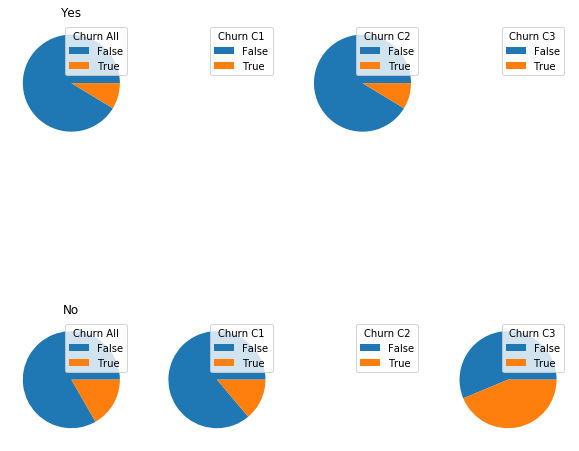

In [121]:
#plot the pie charts for the churn rates of people who do and dont have voice mail messages
fig, axes = plt.subplots(2, 4, figsize=(10,10))
print("Voice Mail Plan")
for ax in range(len(axes)):
    #set the title for the rows
    if ax == 0:
        axes[ax][0].set_title('Yes')
    else:
        axes[ax][0].set_title('No')
    for a in range(len(axes[ax])):
        #create the pie chart based on row poosition
        if ax == 0:
            axes[ax][a].pie(vmaily[a])
        else:
            axes[ax][a].pie(vmailn[a])
        #create a legend for each pie chart based on column position
        if a == 0:
            axes[ax][a].legend(title='Churn All',labels=['False', 'True'], loc='upper right')
        else:
            axes[ax][a].legend(title='Churn C{}'.format(a),labels=['False', 'True'], loc='upper right')

International Plan


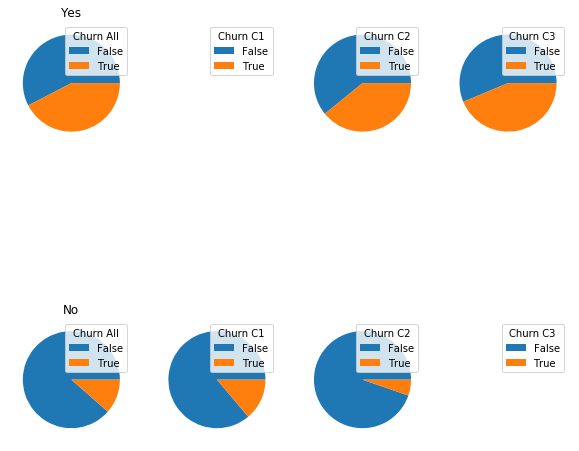

In [122]:
#create pie charts for churn rates of people who do and dont have international calling
fig, axes = plt.subplots(2, 4, figsize=(10,10))
print("International Plan")
for ax in range(len(axes)):
    #set row labels
    if ax == 0:
        axes[ax][0].set_title('Yes')
    else:
        axes[ax][0].set_title('No')
    for a in range(len(axes[ax])):
        #create pie chart based on row
        if ax == 0:
            axes[ax][a].pie(intery[a])
        elif ax==1:
            axes[ax][a].pie(intern[a])
        #create legend for each column position
        if a == 0:
            axes[ax][a].legend(title='Churn All',labels=['False', 'True'], loc='upper right')
        else:
            axes[ax][a].legend(title='Churn C{}'.format(a),labels=['False', 'True'], loc='upper right')   